In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\nunev\Downloads\cloud-burst-v2.csv")
df.shape

(96792, 18)

In [3]:
df1 = pd.read_csv(r"C:\users\nunev\Downloads\cloud-burst-v1.csv")
df1.shape

(96792, 23)

## Feature Engineering

In [5]:
X=df.drop(['CloudBurst Today', 'CloudBurstTomorrow'], axis=1)
y1 = df['CloudBurst Today'] # cloud burst today prediction
y2 = df['CloudBurstTomorrow'] # cloud burst tomorow prediction

## Model Development

Here, we are supposed to predict the occurrence of cloud burst today and tomorrow (i.e. yes/no) which are two independent classes. So we will be using some classification algorithms in machine learning to predict. Here we also compare the performance of various models using some metrics like accuracy score, classification report, f1 score, precision - recall etc.

### Train test split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y1_train, y1_test = train_test_split(X,y1, stratify=y1, random_state=42, test_size=0.2)
X_train, X_test, y2_train, y2_test = train_test_split(X,y2, stratify=y2, random_state=42, test_size=0.2)
print(X_train.shape, X_test.shape, y1_train.shape, y1_test.shape)

(77433, 16) (19359, 16) (77433,) (19359,)


In [10]:
print(y2_train.shape, y2_test.shape)

(77433,) (19359,)


In [11]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, roc_auc_score, confusion_matrix

In [12]:
df.columns

Index(['MinimumTemperature', 'MaximumTemperature', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temperature9am', 'Temperature3pm', 'CloudBurst Today',
       'CloudBurstTomorrow'],
      dtype='object')

In [13]:
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)

### 1. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=100000)
# train the model
log_reg.fit(X_train, y1_train)
# prediction for today
y_predict1 = log_reg.predict(X_test)
# accuracy of the model
y1_probs = log_reg.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y1_test, y_predict1))
print("Classification report: ", classification_report(y1_test, y_predict1))
print("F1 score: ", f1_score(y1_test, y_predict1, average='macro'))
print("ROC score: ", roc_auc_score(y1_test, y1_probs, multi_class='ovr'))
prec, rec, _ = precision_recall_curve(y1_test, y_predict1)
disp = PrecisionRecallDisplay(precision=prec, recall=rec)
disp.plot()
plt.show()
print("Precision: ", precision_score(y1_test, y_predict1, average='macro'))
print("Recall: ", recall_score(y1_test, y_predict1, average='macro'))

Accuracy score:  0.9354305490986105
Classification report:                precision    recall  f1-score   support

           0       0.94      1.00      0.97     18109
           1       0.00      0.00      0.00       336
           2       0.00      0.00      0.00       914

    accuracy                           0.94     19359
   macro avg       0.31      0.33      0.32     19359
weighted avg       0.88      0.94      0.90     19359

F1 score:  0.32221273264296646
ROC score:  0.5060464768282156


C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ValueError: multiclass format is not supported

In [23]:
log_reg.fit(X_train, y2_train)
y2_predict = log_reg.predict(X_test)
y2_probs = log_reg.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y2_test, y2_predict))
print("Classification report: \n", classification_report(y2_test, y2_predict))
print("F1 score: ", f1_score(y2_test, y2_predict, average='macro'))
print("ROC score: ", roc_auc_score(y2_test, y2_probs, multi_class='ovr'))

Accuracy score:  0.8637842863784286
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     16484
           1       0.00      0.00      0.00       356
           2       0.62      0.22      0.32      2519

    accuracy                           0.86     19359
   macro avg       0.50      0.40      0.42     19359
weighted avg       0.83      0.86      0.83     19359

F1 score:  0.4150931827456436
ROC score:  0.7515168307012505


C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [31]:
# cloud burst today
print("Today: \n", confusion_matrix(y1_test, y_predict1))
print("Tomorrow: \n", confusion_matrix(y2_test, y2_predict))

Today: 
 [[18109     0     0]
 [  336     0     0]
 [  914     0     0]]
Tomorrow: 
 [[16180     0   304]
 [  334     0    22]
 [ 1977     0   542]]


#### 2. Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50, max_depth=18, random_state=42)
model.fit(X_train, y1_train)
y1_predict = model.predict(X_test)
y1_probs = model.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y1_test, y1_predict))
print(classification_report(y1_test, y1_predict))
print("ROC score: ", roc_auc_score(y1_test, y1_probs, multi_class='ovr'))

Accuracy score:  0.9354305490986105
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18109
           1       0.00      0.00      0.00       336
           2       0.00      0.00      0.00       914

    accuracy                           0.94     19359
   macro avg       0.31      0.33      0.32     19359
weighted avg       0.88      0.94      0.90     19359

ROC score:  0.4969696746800145


C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
model.fit(X_train, y2_train)
y2_predict = model.predict(X_test)
print("Accuracy score: ", accuracy_score(y2_test, y2_predict))
print("Classification report: \n", classification_report(y2_test, y2_predict))
print("F1 score: ", f1_score(y2_test, y2_predict, average='macro'))
print("ROC score: ", roc_auc_score(y2_test, y2_probs, multi_class='ovr'))

Accuracy score:  0.8670902422645798
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     16484
           1       0.00      0.00      0.00       356
           2       0.67      0.22      0.33      2519

    accuracy                           0.87     19359
   macro avg       0.52      0.40      0.42     19359
weighted avg       0.83      0.87      0.83     19359

F1 score:  0.41851719771537255
ROC score:  0.7515168307012505


C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [37]:
print("Today: \n", confusion_matrix(y1_test, y1_predict))
print("Tomorrow: \n", confusion_matrix(y2_test, y2_predict))

Today: 
 [[18109     0     0]
 [  336     0     0]
 [  914     0     0]]
Tomorrow: 
 [[16239     0   245]
 [  336     0    20]
 [ 1972     0   547]]


#### 3. Gradient Boosting Algorithm

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train, y1_train)
y1_predict = gb_clf.predict(X_test)
y1_probs = model.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y1_test, y1_predict))
print(classification_report(y1_test, y1_predict))
print("F1 score: ", f1_score(y1_test, y1_predict, average='macro'))
print("ROC score: ", roc_auc_score(y1_test, y1_probs, multi_class='ovr'))

Accuracy score:  0.9352755824164471
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18109
           1       0.00      0.00      0.00       336
           2       0.00      0.00      0.00       914

    accuracy                           0.94     19359
   macro avg       0.31      0.33      0.32     19359
weighted avg       0.88      0.94      0.90     19359

F1 score:  0.3221851505849904
ROC score:  0.47942055932150685


In [40]:
gb_clf.fit(X_train, y2_train)
y2_predict = gb_clf.predict(X_test)
y2_probs = gb_clf.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y2_test, y2_predict))
print("Classification report: \n", classification_report(y2_test, y2_predict))
print("F1 score: ", f1_score(y2_test, y2_predict, average='macro'))
print("ROC score: ", roc_auc_score(y2_test, y2_probs, multi_class='ovr'))

Accuracy score:  0.8679167312361176
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     16484
           1       0.59      0.08      0.15       356
           2       0.66      0.23      0.34      2519

    accuracy                           0.87     19359
   macro avg       0.71      0.43      0.47     19359
weighted avg       0.84      0.87      0.84     19359

F1 score:  0.4709144681965614
ROC score:  0.7924956360939057


In [43]:
print("Today: \n", confusion_matrix(y1_test, y1_predict))
print("Tomorrow: \n", confusion_matrix(y2_test, y2_predict))

Today: 
 [[18106     1     2]
 [  336     0     0]
 [  914     0     0]]
Tomorrow: 
 [[16201     8   275]
 [  309    30    17]
 [ 1935    13   571]]


#### 4. Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=3, min_samples_split=2, random_state=42)
dtree.fit(X_train, y1_train)
y1_pred = dtree.predict(X_test)
y1_probs = dtree.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y1_test, y1_predict))
print(classification_report(y1_test, y1_predict))
print("F1 score: ", f1_score(y1_test, y1_predict, average='macro'))
print("ROC score: ", roc_auc_score(y1_test, y1_probs, multi_class='ovr'))

Accuracy score:  0.9352755824164471
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18109
           1       0.00      0.00      0.00       336
           2       0.00      0.00      0.00       914

    accuracy                           0.94     19359
   macro avg       0.31      0.33      0.32     19359
weighted avg       0.88      0.94      0.90     19359

F1 score:  0.3221851505849904
ROC score:  0.49699842856587156


In [47]:
dtree.fit(X_train, y2_train)
y2_pred = dtree.predict(X_test)
y2_probs = dtree.predict_proba(X_test)
print("Accuracy score: ", accuracy_score(y2_test, y2_predict))
print("Classification report: \n", classification_report(y2_test, y2_predict))
print("F1 score: ", f1_score(y2_test, y2_predict, average='macro'))
print("ROC score: ", roc_auc_score(y2_test, y2_probs, multi_class='ovr'))

Accuracy score:  0.8679167312361176
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93     16484
           1       0.59      0.08      0.15       356
           2       0.66      0.23      0.34      2519

    accuracy                           0.87     19359
   macro avg       0.71      0.43      0.47     19359
weighted avg       0.84      0.87      0.84     19359

F1 score:  0.4709144681965614
ROC score:  0.6004559417849857


In [49]:
from sklearn.tree import export_text
rules = export_text(dtree, feature_names=['MinimumTemperature', 'MaximumTemperature', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temperature9am', 'Temperature3pm'])
print(rules)

|--- Humidity3pm <= 1.04
|   |--- class: 0
|--- Humidity3pm >  1.04
|   |--- Humidity3pm <= 1.96
|   |   |--- class: 0
|   |--- Humidity3pm >  1.96
|   |   |--- class: 2



In [51]:
print("Today: \n", confusion_matrix(y1_test, y1_predict))
print("Tomorrow: \n", confusion_matrix(y2_test, y2_predict))

Today: 
 [[18106     1     2]
 [  336     0     0]
 [  914     0     0]]
Tomorrow: 
 [[16201     8   275]
 [  309    30    17]
 [ 1935    13   571]]


#### 5. Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
# Initialize and fit the Naive Bayes classifier (Gaussian Naive Bayes)
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train, y1_train)

# Make predictions
y1_pred = naive_bayes_classifier.predict(X_test)
y_probs = naive_bayes_classifier.predict_proba(X_test)
# Evaluate the model
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y1_test, y1_pred))

# other metrics
print("F1 score: ", f1_score(y1_test, y1_predict, average='macro'))
print("ROC score: ", roc_auc_score(y1_test, y1_probs, multi_class='ovr'))

Accuracy: 0.9354305490986105
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     18109
           1       0.00      0.00      0.00       336
           2       0.00      0.00      0.00       914

    accuracy                           0.94     19359
   macro avg       0.31      0.33      0.32     19359
weighted avg       0.88      0.94      0.90     19359

F1 score:  0.3221851505849904
ROC score:  0.49699842856587156


C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nunev\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [55]:
naive_bayes_classifier.fit(X_train, y2_train)

# Make predictions
y2_pred = naive_bayes_classifier.predict(X_test)
y2_probs = naive_bayes_classifier.predict_proba(X_test)
# Evaluate the model
accuracy = accuracy_score(y2_test, y2_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y2_test, y2_pred))
print("F1 score: ", f1_score(y2_test, y2_predict, average='macro'))
print("ROC score: ", roc_auc_score(y2_test, y2_probs, multi_class='ovr'))

Accuracy: 0.8097525698641459
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     16484
           1       0.00      0.00      0.00       356
           2       0.36      0.44      0.40      2519

    accuracy                           0.81     19359
   macro avg       0.42      0.44      0.43     19359
weighted avg       0.81      0.81      0.81     19359

F1 score:  0.4709144681965614
ROC score:  0.7282371000217136


In [57]:
print("Today: \n", confusion_matrix(y1_test, y1_predict))
print("Tomorrow: \n", confusion_matrix(y2_test, y2_predict))

Today: 
 [[18106     1     2]
 [  336     0     0]
 [  914     0     0]]
Tomorrow: 
 [[16201     8   275]
 [  309    30    17]
 [ 1935    13   571]]


### Clustering and Anomaly Detection

In [59]:
from sklearn.cluster import DBSCAN

X1 = df[['MinimumTemperature', 'MaximumTemperature', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temperature9am', 'Temperature3pm', 'CloudBurst Today']]
# defining the parameters
epsilon = 0.6
minSamples = 10

dbscan = DBSCAN(eps=epsilon, min_samples=minSamples)
dbscan.fit(X1)

# Add cluster labels to the original DataFrame
df['Cloud_burst_today_clusters'] = dbscan.labels_

# Display the clustered data
print("DBSCAN Clustered Data:")
df['Cloud_burst_today_clusters'].value_counts()

DBSCAN Clustered Data:


Cloud_burst_today_clusters
-1    96751
 0       41
Name: count, dtype: int64

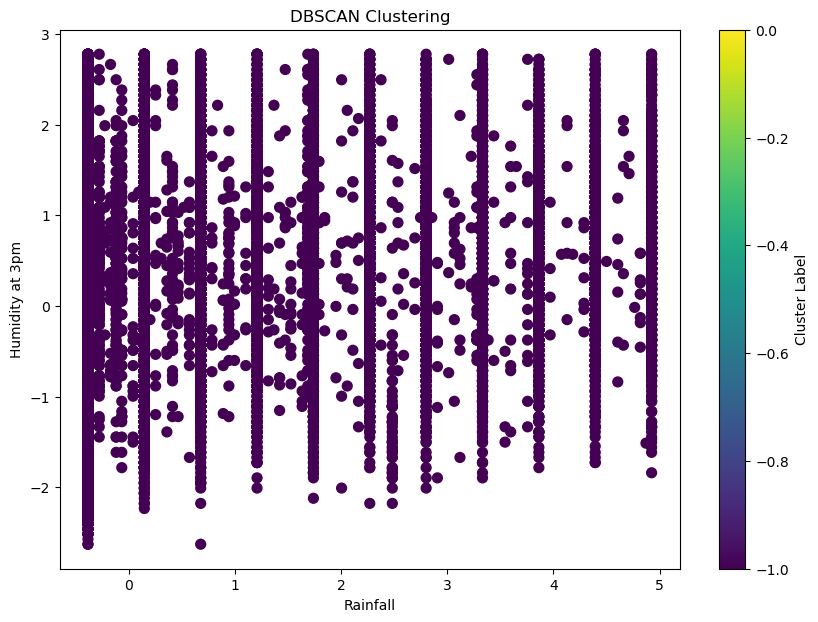

In [60]:
plt.figure(figsize=(10, 7))
plt.scatter(df['Rainfall'], df['Humidity3pm'], c=df['Cloud_burst_today_clusters'], cmap='viridis', s=50)
plt.xlabel('Rainfall')
plt.ylabel('Humidity at 3pm')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

In [61]:
X2 = df[['MinimumTemperature', 'MaximumTemperature', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temperature9am', 'Temperature3pm', 'CloudBurstTomorrow']]
# defining the parameters
epsilon = 0.6
minSamples = 10

dbscan = DBSCAN(eps=epsilon, min_samples=minSamples)
dbscan.fit(X2)

# Add cluster labels to the original DataFrame
df['Cloud_burst_tomorrow_clusters'] = dbscan.labels_

# Display the clustered data
print("DBSCAN Clustered Data:")
df['Cloud_burst_tomorrow_clusters'].value_counts()

DBSCAN Clustered Data:


Cloud_burst_tomorrow_clusters
-1    96755
 0       37
Name: count, dtype: int64

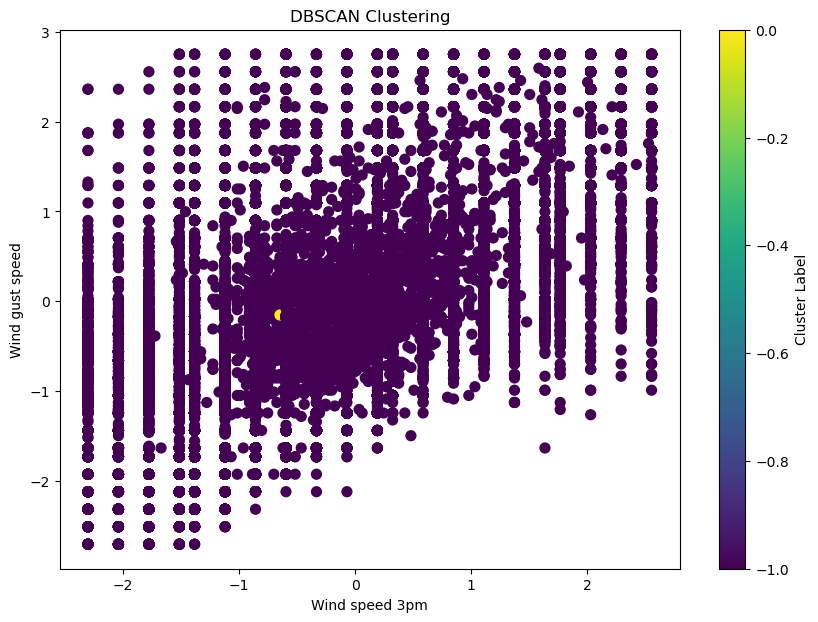

In [62]:
plt.figure(figsize=(10, 7))
plt.scatter(df['WindSpeed3pm'],df['WindGustSpeed'], c=df['Cloud_burst_today_clusters'], cmap='viridis', s=50)
plt.xlabel('Wind speed 3pm')
plt.ylabel('Wind gust speed')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster Label')
plt.show()

### Hyperparameter Tuning

In [42]:
# Logistic Regression
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning
c = [0.01, 0.1, 1, 10]
acc = []
for i in c:
  lr = LogisticRegression(C=i)
  lr.fit(X_train, y1_train)
  results = lr.predict(X_test)
  acc.append(accuracy_score(y1_test, results))
print('The value of C for the best accuracy is ', c[np.argmax(acc)], ' with the accuracy ', np.max(acc))

The value of C for the best accuracy is  0.01  with the accuracy  0.9354305490986105


In [43]:
best_lr = LogisticRegression(C=c[np.argmax(acc)])
best_lr.fit(X_train, y1_train)
pred1 = best_lr.predict(X_test)
print('Accuracy with best value of C is ', accuracy_score(y1_test, pred1))

Accuracy with best value of C is  0.9354305490986105


In [44]:
best_lr = LogisticRegression(C=c[np.argmax(acc)])
best_lr.fit(X_train, y2_train)
pred1 = best_lr.predict(X_test)
print('Accuracy with best value of C is ', accuracy_score(y2_test, pred1))

Accuracy with best value of C is  0.8630611085283331


In [45]:
# Random forest classifier - Cloud today
params = {
    'criterion': ['gini', 'entropy'],
    'n_estimators': [10,25,50],
    'max_depth': [6,12,18]
}
#grid search
grid_ser = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=2)
grid_ser.fit(X_train, y1_train)
print('Random forest classifier: ')
print('Best parameters: ', grid_ser.best_params_)
print('Best estimators: ', grid_ser.best_estimator_)
print('Best score: ', grid_ser.best_score_)
print('Accuracy: ', accuracy_score(y1_test, grid_ser.predict(X_test)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random forest classifier: 
Best parameters:  {'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 10}
Best estimators:  RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=10,
                       random_state=42)
Best score:  0.9354280474086822
Accuracy:  0.9354305490986105


In [46]:
# Random forest classifier - Cloud tomorrow
grid_ser = GridSearchCV(estimator=model, param_grid=params, cv=5, n_jobs=-1, verbose=2)
grid_ser.fit(X_train, y2_train)
print('Random forest classifier: ')
print('Best parameters: ', grid_ser.best_params_)
print('Best estimators: ', grid_ser.best_estimator_)
print('Best score: ', grid_ser.best_score_)
print('Accuracy: ', accuracy_score(y2_test, grid_ser.predict(X_test)))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Random forest classifier: 
Best parameters:  {'criterion': 'gini', 'max_depth': 18, 'n_estimators': 50}
Best estimators:  RandomForestClassifier(max_depth=18, n_estimators=50, random_state=42)
Best score:  0.8674208722765828
Accuracy:  0.8670902422645798


In [47]:
best_clf = RandomForestClassifier(max_depth=6, n_estimators=10, random_state=42)
best_clf.fit(X_train, y1_train)
pred = best_clf.predict(X_test)
print('Accuracy with best parameters is ', accuracy_score(y1_test, pred))

Accuracy with best parameters is  0.9354305490986105


In [48]:
best_clf = RandomForestClassifier(max_depth=18, n_estimators=50, random_state=42)
best_clf.fit(X_train, y2_train)
pred = best_clf.predict(X_test)
print('Accuracy with best parameters is ', accuracy_score(y2_test, pred))

Accuracy with best parameters is  0.8670902422645798


In [49]:
# Decision tree classifier
params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 8],
    'max_leaf_nodes': [3, 7, 12, 15]
}
grid_cv = GridSearchCV(estimator=dtree, param_grid=params, cv=5, n_jobs=-1, verbose=2)
grid_cv.fit(X_train, y1_train)
print('Decision tree classifier: ')
print('Best parameters: ', grid_cv.best_params_)
print('Best estimators: ', grid_cv.best_estimator_)
print('Best score: ', grid_cv.best_score_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Decision tree classifier: 
Best parameters:  {'max_depth': 5, 'max_leaf_nodes': 3, 'min_samples_split': 2}
Best estimators:  DecisionTreeClassifier(max_depth=5, max_leaf_nodes=3, random_state=42)
Best score:  0.9354022176269439


In [50]:
best_clf1 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=3, min_samples_split=2, random_state=42)
best_clf1.fit(X_train, y1_train)
preds = best_clf1.predict(X_test)
print('Accuracy with best parameters: ', accuracy_score(y1_test, preds))

Accuracy with best parameters:  0.9353788935378894


In [51]:
best_clf1 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=3, min_samples_split=2, random_state=42)
best_clf1.fit(X_train, y2_train)
preds = best_clf1.predict(X_test)
print('Accuracy with best parameters: ', accuracy_score(y2_test, preds))

Accuracy with best parameters:  0.8596001859600186


### Fuzzy Association Rule Mining

In [53]:
!pip install scikit-fuzzy

In [54]:
df1.columns

Index(['Date', 'Location', 'MinimumTemperature', 'MaximumTemperature',
       'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDirection',
       'WindGustSpeed', 'WindDirection9am', 'WindDirection3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temperature9am',
       'Temperature3pm', 'CloudBurst Today', 'CloudBurstTomorrow'],
      dtype='object')

In [55]:
df1.describe()

,MinimumTemperature,MaximumTemperature,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temperature9am,Temperature3pm
count,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000,96792.000000
mean,11.670258,23.838949,0.145245,5.049841,9.056498,36.773142,12.598694,17.537071,67.208319,47.680846,1018.986949,1016.342150,3.302031,3.440061,16.981507,22.374793
std,6.339668,6.460868,0.376626,2.253331,1.957086,10.257901,7.767430,7.616850,16.948935,17.754355,6.001973,6.034848,2.414673,2.233503,6.226649,6.226103
min,-6.200000,2.900000,0.000000,0.000000,3.460000,9.000000,0.000000,0.000000,22.000000,1.000000,1002.400000,999.500000,0.000000,0.000000,-1.000000,4.400000
25%,7.100000,19.000000,0.000000,3.480000,7.900000,30.000000,7.000000,11.000000,56.000000,35.000000,1014.900000,1012.180000,1.000000,1.600000,12.500000,17.800000
50%,11.500000,23.500000,0.000000,4.840000,9.300000,35.000000,11.000000,17.000000,67.000000,48.000000,1018.800000,1016.300000,2.800000,3.000000,16.900000,22.000000
75%,16.200000,28.500000,0.000000,6.400000,10.300000,43.000000,17.800000,22.000000,79.000000,60.000000,1023.040000,1020.500000,5.000000,5.000000,21.500000,26.700000
max,30.200000,43.500000,2.000000,11.600000,14.300000,65.000000,37.000000,37.000000,100.000000,97.000000,1035.500000,1033.100000,9.000000,9.000000,35.000000,40.100000


In [56]:
numCols = ['MinimumTemperature', 'MaximumTemperature', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temperature9am', 'Temperature3pm']

In [57]:
import skfuzzy as fuzz
# for every column
for col in numCols:
    #item range
    item_range = np.linspace(np.min(df1[col]), np.max(df1[col]), df1.shape[0])
    q1, q2, q3 = np.percentile(df1[col], [25,50,75])
    df1[f'{col}_low'] = fuzz.trimf(item_range, [np.min(df1[col]), q1, q2])
    df1[f'{col}_mid'] = fuzz.trimf(item_range, [q1, q2, q3])
    df1[f'{col}_high'] = fuzz.trimf(item_range, [q2, q3, np.max(df1[col])])
    # fuzzify the dataset
    df1[f'{col}_Low'] = fuzz.interp_membership(item_range, df1[f'{col}_low'], df1[col])
    df1[f'{col}_Medium'] = fuzz.interp_membership(item_range, df1[f'{col}_mid'], df1[col])
    df1[f'{col}_High'] = fuzz.interp_membership(item_range, df1[f'{col}_high'], df1[col])

In [58]:
for col in numCols: 
    # Binarize the fuzzy membership values
    df1[f'{col}_Low_Bin'] = np.where(df1[f'{col}_Low'] > 0.5, 1, 0)
    df1[f'{col}_Medium_Bin'] = np.where(df1[f'{col}_Medium'] > 0.5, 1, 0)
    df1[f'{col}_High_Bin'] = np.where(df1[f'{col}_High'] > 0.5, 1, 0)

    df1.drop([f'{col}_low',f'{col}_mid',f'{col}_high', f'{col}_Low', f'{col}_Medium', f'{col}_High'], axis=1, inplace=True)

C:\Users\nunev\AppData\Local\Temp\ipykernel_3224\1572395971.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df1[f'{col}_High_Bin'] = np.where(df1[f'{col}_High'] > 0.5, 1, 0)


In [59]:
df_fuzzy = df1.drop(numCols, axis=1)
df_fuzzy.head()

,Date,Location,WindGustDirection,WindDirection9am,WindDirection3pm,CloudBurst Today,CloudBurstTomorrow,MinimumTemperature_Low_Bin,MinimumTemperature_Medium_Bin,MinimumTemperature_High_Bin,...,Cloud9am_High_Bin,Cloud3pm_Low_Bin,Cloud3pm_Medium_Bin,Cloud3pm_High_Bin,Temperature9am_Low_Bin,Temperature9am_Medium_Bin,Temperature9am_High_Bin,Temperature3pm_Low_Bin,Temperature3pm_Medium_Bin,Temperature3pm_High_Bin
0,2008-12-01,Albury,W,W,WNW,No,No,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,2008-12-02,Albury,WNW,NNW,WSW,No,No,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,2008-12-03,Albury,WSW,W,WSW,No,No,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,2008-12-04,Albury,NE,SE,E,No,No,1,0,0,...,0,1,0,0,0,1,0,0,0,1
4,2008-12-05,Albury,W,ENE,NW,No,No,0,0,1,...,0,0,0,0,0,1,0,0,0,1


In [60]:
# df_fuzzy.columns
# 55 columns

In [62]:
catCols = ['Date', 'Location', 'WindGustDirection','WindDirection9am', 'WindDirection3pm', 'CloudBurst Today', 'CloudBurstTomorrow']

# One-hot encoding the 'Weather Type' column
df1_encoded = pd.get_dummies(df_fuzzy, columns=catCols, drop_first=True, dtype=int)
# Display the result
# print(df1_encoded.head())

In [63]:
from mlxtend.frequent_patterns import apriori, association_rules

# Prepare the dataset for Apriori by keeping only the binary columns
df_binary = df1_encoded

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(df_binary, min_support=0.25, use_colnames=True)

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Display the generated rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


C:\Users\nunev\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                           antecedents  \
0                         (MinimumTemperature_Low_Bin)   
1                         (MinimumTemperature_Low_Bin)   
2                         (MinimumTemperature_Low_Bin)   
3                             (Temperature9am_Low_Bin)   
4                         (MinimumTemperature_Low_Bin)   
..                                                 ...   
389     (Temperature3pm_High_Bin, Rainfall_Medium_Bin)   
390   (MaximumTemperature_High_Bin, Rainfall_High_Bin)   
391  (MaximumTemperature_High_Bin, Rainfall_Medium_...   
392                          (Temperature3pm_High_Bin)   
393                      (MaximumTemperature_High_Bin)   

                                           consequents   support  confidence  \
0                                   (Rainfall_Low_Bin)  0.255476    0.760791   
1                                (Rainfall_Medium_Bin)  0.255476    0.760791   
2                                  (Rainfall_High_Bin)  0.31433

In [66]:
rules[(rules['confidence'] == 1) & (rules['lift'] >= 1)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20,(Rainfall_Low_Bin),(Rainfall_Medium_Bin),0.785798,0.785798,0.785798,1.0,1.272591,0.168319,inf,1.000000
21,(Rainfall_Medium_Bin),(Rainfall_Low_Bin),0.785798,0.785798,0.785798,1.0,1.272591,0.168319,inf,1.000000
22,(Rainfall_Low_Bin),(Rainfall_High_Bin),0.785798,0.936844,0.785798,1.0,1.067414,0.049628,inf,0.294844
36,(Rainfall_Medium_Bin),(Rainfall_High_Bin),0.785798,0.936844,0.785798,1.0,1.067414,0.049628,inf,0.294844
78,"(MinimumTemperature_Low_Bin, Rainfall_Low_Bin)",(Rainfall_Medium_Bin),0.255476,0.785798,0.255476,1.0,1.272591,0.054723,inf,0.287703
...,...,...,...,...,...,...,...,...,...,...
371,"(MaximumTemperature_High_Bin, Rainfall_Low_Bin...",(Rainfall_Medium_Bin),0.258244,0.785798,0.258244,1.0,1.272591,0.055316,inf,0.288777
372,"(MaximumTemperature_High_Bin, Rainfall_Low_Bin...",(Rainfall_High_Bin),0.258244,0.936844,0.258244,1.0,1.067414,0.016310,inf,0.085144
375,"(MaximumTemperature_High_Bin, Rainfall_High_Bi...",(Rainfall_Low_Bin),0.258244,0.785798,0.258244,1.0,1.272591,0.055316,inf,0.288777
376,"(MaximumTemperature_High_Bin, Rainfall_Low_Bin...","(Rainfall_High_Bin, Rainfall_Medium_Bin)",0.258244,0.785798,0.258244,1.0,1.272591,0.055316,inf,0.288777


In [68]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
# Apply FP-Growth to find frequent itemsets
frequent_itemsets = fpgrowth(df_binary, min_support=0.25, use_colnames=True)

# Generate association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# Print rules
print(rules)

C:\Users\nunev\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


                                      antecedents  \
0                         (WindSpeed9am_High_Bin)   
1                         (WindSpeed9am_High_Bin)   
2                         (WindSpeed9am_High_Bin)   
3      (WindSpeed9am_High_Bin, Rainfall_High_Bin)   
4    (WindSpeed9am_High_Bin, Rainfall_Medium_Bin)   
..                                            ...   
389     (Rainfall_High_Bin, Pressure3pm_High_Bin)   
390     (Rainfall_High_Bin, Pressure9am_High_Bin)   
391  (Pressure3pm_High_Bin, Pressure9am_High_Bin)   
392                        (Pressure3pm_High_Bin)   
393                        (Pressure9am_High_Bin)   

                                   consequents  antecedent support  \
0                          (Rainfall_High_Bin)            0.351672   
1                        (Rainfall_Medium_Bin)            0.351672   
2                           (Rainfall_Low_Bin)            0.351672   
3                        (Rainfall_Medium_Bin)            0.326267   
4            

In [69]:
rules[(rules['confidence'] == 1) & (rules['lift'] >= 1)].shape

(144, 10)

In [72]:
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(WindSpeed9am_High_Bin),(Rainfall_High_Bin),0.351672,0.936844,0.326267,0.927759,0.990303,-0.003195,0.874245,-0.014879
1,(WindSpeed9am_High_Bin),(Rainfall_Medium_Bin),0.351672,0.785798,0.274950,0.781838,0.994961,-0.001393,0.981849,-0.007752
2,(WindSpeed9am_High_Bin),(Rainfall_Low_Bin),0.351672,0.785798,0.274950,0.781838,0.994961,-0.001393,0.981849,-0.007752
3,"(WindSpeed9am_High_Bin, Rainfall_High_Bin)",(Rainfall_Medium_Bin),0.326267,0.785798,0.274950,0.842717,1.072434,0.018571,1.361886,0.100250
4,"(WindSpeed9am_High_Bin, Rainfall_Medium_Bin)",(Rainfall_High_Bin),0.274950,0.936844,0.274950,1.000000,1.067414,0.017365,inf,0.087106
5,(WindSpeed9am_High_Bin),"(Rainfall_High_Bin, Rainfall_Medium_Bin)",0.351672,0.785798,0.274950,0.781838,0.994961,-0.001393,0.981849,-0.007752
6,"(WindSpeed9am_High_Bin, Rainfall_Low_Bin)",(Rainfall_High_Bin),0.274950,0.936844,0.274950,1.000000,1.067414,0.017365,inf,0.087106
7,"(WindSpeed9am_High_Bin, Rainfall_High_Bin)",(Rainfall_Low_Bin),0.326267,0.785798,0.274950,0.842717,1.072434,0.018571,1.361886,0.100250
8,(WindSpeed9am_High_Bin),"(Rainfall_Low_Bin, Rainfall_High_Bin)",0.351672,0.785798,0.274950,0.781838,0.994961,-0.001393,0.981849,-0.007752
9,"(WindSpeed9am_High_Bin, Rainfall_Low_Bin)",(Rainfall_Medium_Bin),0.274950,0.785798,0.274950,1.000000,1.272591,0.058895,inf,0.295430
